# Credit Card Clustering

Credit card clustering, also known as credit card segmentation, involves grouping credit card holders based on various factors such as buying habits, credit limits, and other financial behaviors. This clustering analysis is crucial for businesses as it helps identify potential customers and develop effective marketing strategies.

For our credit card clustering project using Machine Learning, we will utilize a dataset that captures the buying history of credit card holders. This dataset includes all the necessary features for a comprehensive understanding of credit card cluster analysis. You can download the dataset from [here](https://statso.io/customer-segmentation-case-study/).


In [105]:
import pandas as pd 
import matplotlib.pyplot as plt


from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [12]:
df= pd.read_csv("CC GENERAL.csv")

In [14]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- `CUST_ID`: Customer ID (removable)
- `BALANCE`: Current balance
- `BALANCE_FREQUENCY`: Frequency of balance updates
- `PURCHASES`: Total purchases
- `ONEOFF_PURCHASES`: One-off purchases
- `INSTALLMENTS_PURCHASES`: Installment purchases
- `CASH_ADVANCE`: Cash advance usage
- `PURCHASES_FREQUENCY`: Frequency of purchases
- `ONEOFF_PURCHASES_FREQUENCY`: Frequency of one-off purchases
- `PURCHASES_INSTALLMENTS_FREQUENCY`: Frequency of installment purchases
- `CASH_ADVANCE_FREQUENCY`: Frequency of cash advance usage
- `CASH_ADVANCE_TRX`: Number of cash advance transactions
- `PURCHASES_TRX`: Number of purchase transactions
- `CREDIT_LIMIT`: Credit limit
- `PAYMENTS`: Payments made
- `MINIMUM_PAYMENTS`: Minimum payments
- `PRC_FULL_PAYMENT`: Full payment percentage
- `TENURE`: Credit card tenure


In [21]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [39]:
df.fillna(0, inplace= True)

In [43]:
x= df[["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "PURCHASES_FREQUENCY", "CREDIT_LIMIT", "PAYMENTS"]]

In [74]:
normalize_df= normalize(x)

In [76]:
normalize_df = pd.DataFrame(normalize_df)
normalize_df.columns = x.columns

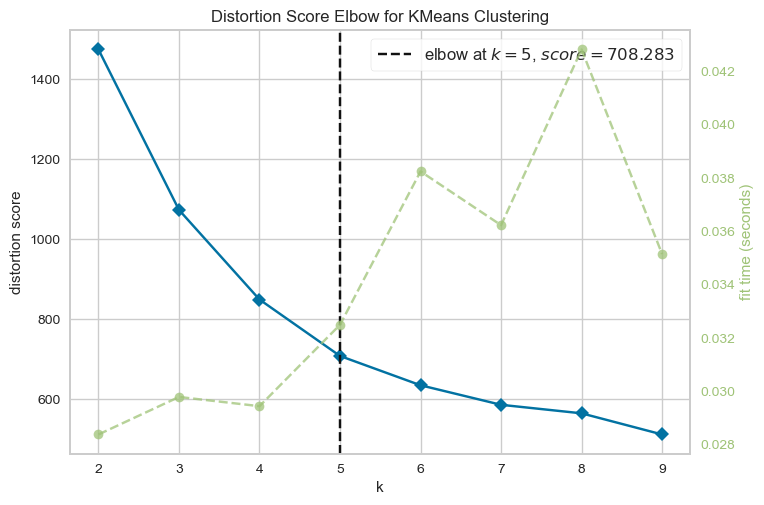

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
# the best optimum point
km= KMeans()
vis= KElbowVisualizer(km, k=(2,10))
vis.fit(normalize_df)
vis.show()

+ it is "5"

In [60]:
model= KMeans(5)

In [80]:
model= model.fit(normalize_df)

In [86]:
pred= model.predict(normalize_df)

In [66]:
pred

array([5, 3, 0, ..., 5, 5, 5])

In [88]:
normalize_df["cluster"]= pred
normalize_df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,cluster
0,0.039715,0.092633,0.000000,0.092633,0.000000,0.000162,0.971000,0.195950,3
1,0.295309,0.000000,0.000000,0.000000,0.594123,0.000000,0.645491,0.378353,5
2,0.311752,0.096602,0.096602,0.000000,0.000000,0.000125,0.937073,0.077723,3
3,0.209047,0.188016,0.188016,0.000000,0.025812,0.000010,0.940709,0.000000,3
4,0.510143,0.009982,0.009982,0.000000,0.000000,0.000052,0.748637,0.423189,1


In [91]:
silhouette_score(normalize_df,pred)

0.7228328124543426

In [107]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalize_df)

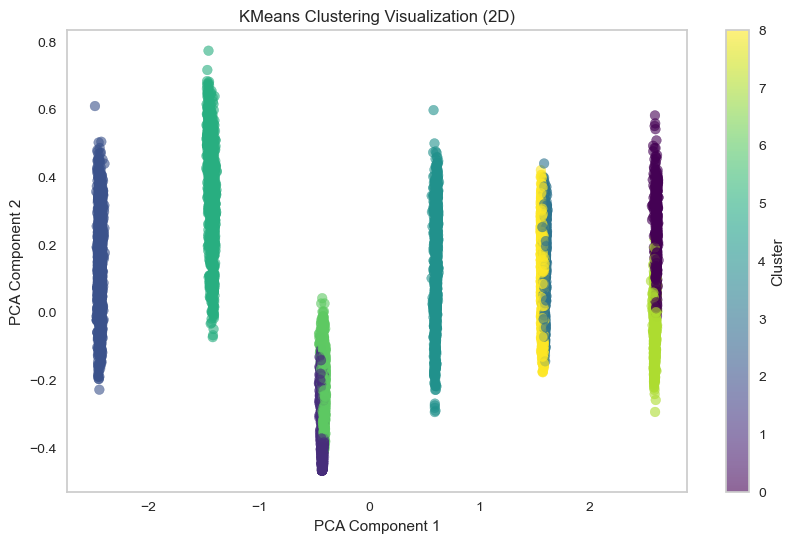

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pred, cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering Visualization (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

## Conclusion

This project successfully utilized clustering techniques to segment credit card holders based on their purchasing behaviors, providing valuable insights for targeted marketing strategies. The analysis demonstrated the effectiveness of KMeans clustering, revealing distinct customer groups that can help financial institutions enhance their services and improve customer satisfaction.
